# Steps for building a machine learning model

1. Importing the data
2. Cleaning the data
3. Exploring the data
4. Training a model
5. Evaluating the model
6. Improving the model  
7. Saving and loading a trained model


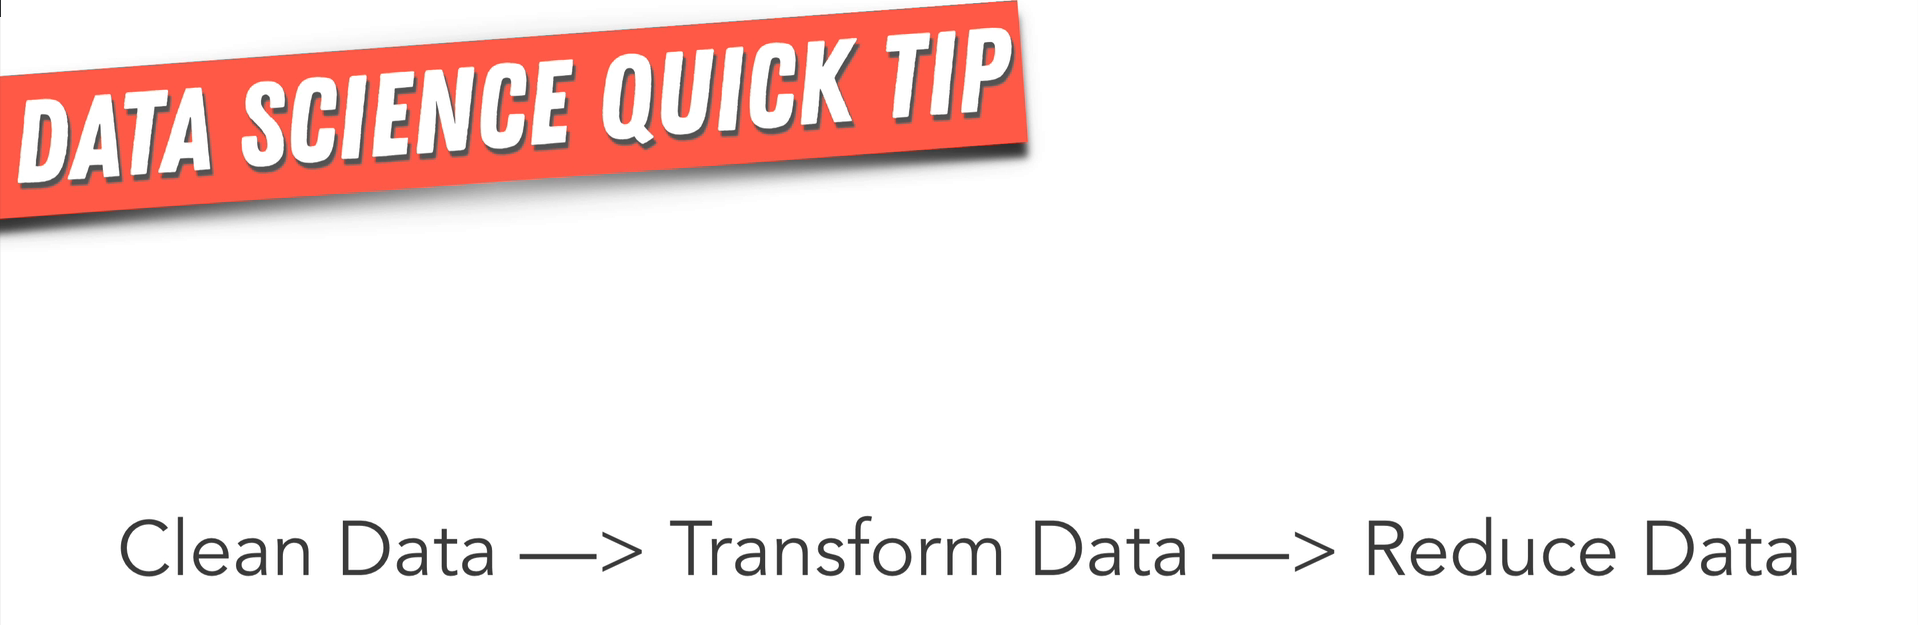

- Cleaning the data:  Removing missing values, removing duplicates, removing outliers, etc.
- Transforming the data: Convert to numeric format that the computer can understand
- Reduce the data : for optimization and efficiency



In [26]:
import pandas as pd
import numpy as np
heart_disease = pd.read_csv('heart-disease.csv')

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
# Create X (features matrix)
# dropping target column since it will be used as label
X = heart_disease.drop('target', axis=1)

# Create y (labels)
y = heart_disease['target']

# Choose the hyper Parameters
## Random Forest Classifier *(Good for Classification Problems)*
----------------------
The ensemble module contains methods that combine multiple ML models 
to create a more powerful predictive model.

Key points about RandomForestClassifier:
- Ensemble learning method that combines multiple decision trees
- Used for classification tasks (categorical predictions)
- Benefits:
  - High accuracy
  - Handles large datasets well
  - Resistant to overfitting
  - Works with high dimensional data

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Keeping the default parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Splitting the data into training and testing 
 

In [29]:
from sklearn.model_selection import train_test_split
# test_size = 0.2 sets test data size to 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fitting the model to the training data

In [30]:
clf.fit(X_train, y_train)

RandomForestClassifier()

# Make a Prediction using *X_test* data

In [31]:
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

# Evaluate the model performance on training and test data

In [32]:
# On training data
clf.score(X_train, y_train)

1.0

In [33]:
# On testing data
clf.score(X_test, y_test)

0.7704918032786885

In [34]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))



              precision    recall  f1-score   support

           0       0.78      0.78      0.78        32
           1       0.76      0.76      0.76        29

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



# Confusion Matrix Summary

## Purpose
- Evaluates classification model performance

## Structure
- 2x2 matrix for binary classification

## Contents
```
[TN, FP]
[FN, TP]
```

Where:
- TN: True Negatives
- FP: False Positives
- FN: False Negatives
- TP: True Positives

## Interpretation
- Shows correct and incorrect predictions for each class

## Benefits
1. Provides detailed performance breakdown
2. Identifies class confusion
3. Serves as basis for various metrics:
   - Accuracy
   - Precision
   - Recall
   - F1-score

- Demonstrates Random Forest Classifier performance in predicting heart disease

## Key Takeaway
The confusion matrix offers a comprehensive view of your model's predictive accuracy, highlighting both its strengths and areas for potential improvement.

# Confusion Matrix Explanation

The confusion matrix you've shown is a 2x2 matrix that summarizes the performance of a binary classification model, in this case, your Random Forest Classifier for predicting heart disease. Let's break it down:

```
array([[14, 12],
       [ 2, 33]], dtype=int64)
```

This matrix represents:

1. **True Negatives (TN) = 14**
   - Cases where the model correctly predicted the absence of heart disease.

2. **False Positives (FP) = 12**
   - Cases where the model incorrectly predicted heart disease when there was none.

3. **False Negatives (FN) = 2**
   - Cases where the model incorrectly predicted no heart disease when there actually was.

4. **True Positives (TP) = 33**
   - Cases where the model correctly predicted the presence of heart disease.

## Interpreting these results:

1. The model correctly identified 14 + 33 = 47 cases out of 61 total cases.
2. It misclassified 12 + 2 = 14 cases.
3. The model seems to be better at identifying positive cases (33 true positives) than negative cases (14 true negatives).
4. There's a higher number of false positives (12) compared to false negatives (2), suggesting the model tends to overpredict heart disease.

This confusion matrix helps you understand where your model is performing well and where it might need improvement. It's particularly useful for assessing the balance between sensitivity (correctly identifying positive cases) and specificity (correctly identifying negative cases) of your model.

In [35]:
confusion_matrix(y_test,y_preds)


array([[25,  7],
       [ 7, 22]], dtype=int64)

# Accuracy Score

In [36]:
accuracy_score(y_test,y_preds)


0.7704918032786885

# Improve the model

In [41]:
# try different amount of n_estimators
#np.random.seed(42)

for i in range(10,100,10):
    print(f"Trying the model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model Accuracy on Test Set: {clf.score(X_test,y_test)* 100:.2f}%  ")
    print()

Trying the model with 10 estimators...
Model Accuracy on Test Set: 78.69%  

Trying the model with 20 estimators...
Model Accuracy on Test Set: 80.33%  

Trying the model with 30 estimators...
Model Accuracy on Test Set: 81.97%  

Trying the model with 40 estimators...
Model Accuracy on Test Set: 80.33%  

Trying the model with 50 estimators...
Model Accuracy on Test Set: 81.97%  

Trying the model with 60 estimators...
Model Accuracy on Test Set: 78.69%  

Trying the model with 70 estimators...
Model Accuracy on Test Set: 78.69%  

Trying the model with 80 estimators...
Model Accuracy on Test Set: 80.33%  

Trying the model with 90 estimators...
Model Accuracy on Test Set: 78.69%  



# Save the model and load it

In [42]:
import pickle 
pickle.dump(clf,open("random_forest_model_1.pkl","wb")) # wb = write byte


In [43]:
# loading the model
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test,y_test)

0.7868852459016393